In [2]:
#https://developers.douban.com/wiki/?title=api_v2
import requests

In [ ]:
http://blog.csdn.net/cjooo0/article/details/51456752
#豆瓣电影Top250爬取的数据的一些简单可视化笔记

In [ ]:
#https://mp.weixin.qq.com/s?__biz=MjM5MDEyMDk4Mw==&mid=2650166012&idx=1&sn=ab577b80c7b3a261ce3b701a816bb639&scene=21#wechat_redirect
#一个很好用的财经数据包：TuShare的介绍

In [ ]:
#研究一下Linux安装字体的方法
#可尝试的方向：ssh上传本地windows字体
#寻找好用的开源Linux字体
#https://wiki.ubuntu.com.cn/%E5%AD%97%E4%BD%93
#http://blog.csdn.net/qq_26990831/article/details/51847416
#ubuntu16.04安装monaco字体

In [1]:
!cd
!wget https://github.com/cstrap/monaco-font/archive/master.zip

--2018-03-21 01:16:31--  https://github.com/cstrap/monaco-font/archive/master.zip
Resolving github.com (github.com)... 52.74.223.119, 13.229.188.59, 13.250.177.223
Connecting to github.com (github.com)|52.74.223.119|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/cstrap/monaco-font/zip/master [following]
--2018-03-21 01:16:32--  https://codeload.github.com/cstrap/monaco-font/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.255.121, 192.30.255.120
Connecting to codeload.github.com (codeload.github.com)|192.30.255.121|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [ <=>                ]   3.14K  --.-KB/s    in 0s      

2018-03-21 01:16:34 (56.0 MB/s) - ‘master.zip’ saved [3217]



In [3]:
url = "https://api.douban.com/v2/book/1220562"
result = requests.get(url)

In [7]:
import json
book = json.loads(result.text)

In [11]:
url = "https://api.douban.com/v2/movie/top250"
result = requests.get(url)
top = json.loads(result.text)

In [15]:
top.keys()

dict_keys(['count', 'start', 'total', 'subjects', 'title'])

In [29]:
url = "https://api.douban.com/v2/movie/top250?start=0&count=250"
result = requests.get(url)
top = json.loads(result.text)

In [32]:
len(top['subjects'])

100

In [35]:
top['subjects'][0].keys()

dict_keys(['rating', 'genres', 'title', 'casts', 'collect_count', 'original_title', 'subtype', 'directors', 'year', 'images', 'alt', 'id'])

In [36]:
top['subjects'][0]['title']

'肖申克的救赎'

In [7]:
import json
base_url = "https://api.douban.com/v2/movie/top250"
params = {}
params['start'] = 0
params['count'] = 10
response = requests.get(base_url, params)
top = json.loads(response.text)
top.keys()

dict_keys(['total', 'subjects', 'count', 'title', 'start'])

In [11]:
import time
step = 50
params['count'] = 50
movie_top_250 = {}
base_url = "https://api.douban.com/v2/movie/top250"
for start in range(0, 250, step):
    params['start'] = start
    try:
        print("Getting top 250 movie informations from {} to {}".format(start, start + params['count']))
        response = requests.get(base_url, params)
        subjects = json.loads(response.text)['subjects']
        for subject in subjects:
            movie_top_250[subject['title']] = subject
        
    except Exception as e:
        print(e)
        print("Getting movie informations failed.")
    
    time.sleep(1)
#保存到json文件
with open("movie_top_250.json", 'w') as f:
    print("Writting movie informations to json file.")
    json.dump(movie_top_250, f)

Getting top 250 movie informations from 0 to 50
Getting top 250 movie informations from 50 to 100
Getting top 250 movie informations from 100 to 150
Getting top 250 movie informations from 150 to 200
Getting top 250 movie informations from 200 to 250


In [15]:
movie_info = movie_top_250.values()

In [17]:
type(movie_info) is list

False

In [2]:
import pandas as pd
import json
movie_info = json.load(open('movie_top_250.json', 'r')).values()

In [29]:
movie_info = list(movie_info)
for index, movie in enumerate(movie_info):
    #print(movie['rating'])
    movie_info[index]['average'] = movie['rating']['average']
    movie_info[index]['max'] = movie['rating']['max']
    movie_info[index]['stars'] = movie['rating']['stars']
    movie_info[index]['min'] = movie['rating']['min']
movie_info[0]

{'alt': 'https://movie.douban.com/subject/2149806/',
 'average': 8.8,
 'casts': [{'alt': 'https://movie.douban.com/celebrity/1036923/',
   'avatars': {'large': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p18584.jpg',
    'medium': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p18584.jpg',
    'small': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/public/p18584.jpg'},
   'id': '1036923',
   'name': '本木雅弘'},
  {'alt': 'https://movie.douban.com/celebrity/1098533/',
   'avatars': {'large': 'https://img1.doubanio.com/view/celebrity/s_ratio_celebrity/public/p50678.jpg',
    'medium': 'https://img1.doubanio.com/view/celebrity/s_ratio_celebrity/public/p50678.jpg',
    'small': 'https://img1.doubanio.com/view/celebrity/s_ratio_celebrity/public/p50678.jpg'},
   'id': '1098533',
   'name': '广末凉子'},
  {'alt': 'https://movie.douban.com/celebrity/1037053/',
   'avatars': {'large': 'https://img3.doubanio.com/view/celebrity/s_ratio_celebrity/pu

In [30]:
df_movie = pd.DataFrame(list(movie_info))

In [9]:
df_rating = pd.DataFrame(df_movie['rating'])

In [20]:
df_rating.columns

Index(['rating'], dtype='object')

In [31]:
df_movie.columns

Index(['alt', 'average', 'casts', 'collect_count', 'directors', 'genres', 'id',
       'images', 'max', 'min', 'original_title', 'rating', 'stars', 'subtype',
       'title', 'year'],
      dtype='object')

In [61]:
top_10_years = df_movie['title'].groupby(df_movie['year']).count().sort_values(ascending=False)[:10]

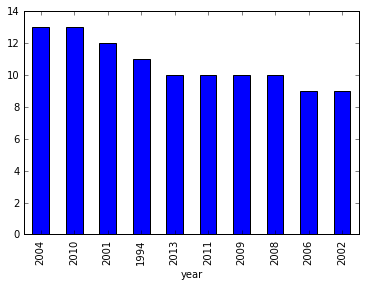

In [64]:
top_10_years.plot(kind='bar')

In [ ]:
df_movie['title'].groupby(df_movie['year']).count().sort_values

In [65]:
df_movie.columns

Index(['alt', 'average', 'casts', 'collect_count', 'directors', 'genres', 'id',
       'images', 'max', 'min', 'original_title', 'rating', 'stars', 'subtype',
       'title', 'year'],
      dtype='object')

In [ ]:
#一种设置ubuntu下matplotlib显示中文字体的方法
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/usr/share/fonts/chinese/wqy-microhei.ttf', size=14)   
#plt.title("高分电影年度分布",  fontproperties=font)

/usr/lib/python3/dist-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


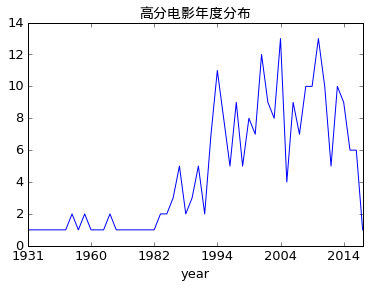

In [86]:
import matplotlib.pyplot as plt
df_movie.groupby('year')['title'].count().plot()
plt.rc('font', family='SimHei', size=13)
plt.title("高分电影年度分布",  fontproperties=font)

In [70]:
df_movie.directors[0][0]['name']

'泷田洋二郎'

In [ ]:
df_movie[['title', 'original_title', 'year', 'average', 'collect_count', 'genres']].sort_values('average', ascending=False)

In [1]:
import pandas as pd

In [15]:
names = ['Ranking', 'Title', 'Original_title', 'Other_title', 'Director', 'Stars', 'Year', 'Country', 'Genres', 'Rating', 'Rating_times', 'Inq']
df_movies = pd.read_csv('movie_info_top250.csv', index_col=0, names=names)

In [16]:
df_movies

,Title,Original_title,Other_title,Director,Stars,Year,Country,Genres,Rating,Rating_times,Inq
Ranking,,,,,,,,,,,
1,肖申克的救赎,The Shawshank Redemption,月黑高飞(港),弗兰克·德拉邦特 Frank Darabont,蒂姆·罗宾斯 Tim Robbins /...,1994,美国,犯罪 剧情,9.6,996348,希望让人自由。
2,霸王别姬,NaN,再见，我的妾,陈凯歌 Kaige Chen,张国荣 Leslie Cheung / 张丰毅 Fengyi Zha...,1993,中国大陆 香港,剧情 爱情 同性,9.5,724045,风华绝代。
3,这个杀手不太冷,Léon,杀手莱昂,吕克·贝松 Luc Besson,让·雷诺 Jean Reno / 娜塔莉·波特曼 ...,1994,法国,剧情 动作 犯罪,9.4,938334,怪蜀黍和小萝莉不得不说的故事。
4,阿甘正传,Forrest Gump,福雷斯特·冈普,Robert Zemeckis,Tom Hanks / Robin Wright Penn / Gary Sinise,1994,美国,剧情 爱情,9.4,798244,一部美国近现代史。
5,美丽人生,La vita è bella,一个快乐的传说(港),罗伯托·贝尼尼 Roberto Benigni,罗伯托·贝尼尼 Roberto Beni...,1997,意大利,剧情 喜剧 爱情 战争,9.5,466366,最美的谎言。
6,千与千寻,千と千尋の神隠し,神隐少女(台),宫崎骏 Hayao Miyazaki,柊瑠美 Rumi Hîragi / 入野自由 Miy...,2001,日本,剧情 动画 奇幻,9.2,746713,最好的宫崎骏，最好的久石让。
7,泰坦尼克号,Titanic,铁达尼号(港,詹姆斯·卡梅隆 James Cameron,莱昂纳多·迪卡普里奥 Leonardo...,1997,美国,剧情 爱情 灾难,9.2,737926,失去的才是永恒的。
8,辛德勒的名单,Schindler's List,舒特拉的名单(港),史蒂文·斯皮尔伯格 Steven Spielberg,连姆·尼森 Liam Neeson...,1993,美国,剧情 历史 战争,9.4,424770,拯救一个人，就是拯救整个世界。
9,盗梦空间,Inception,潜行凶间(港),克里斯托弗·诺兰 Christopher Nolan,莱昂纳多·迪卡普里奥 Le...,2010,美国 英国,剧情 科幻 悬疑 冒险,9.3,839192,诺兰给了我们一场无法盗取的梦。


In [18]:
#pd.cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False)
pd.cut?

In [20]:
pd.cut(range(100), [0, 60, 70, 80, 90, 100])

[NaN, (0, 60], (0, 60], (0, 60], (0, 60], ..., (90, 100], (90, 100], (90, 100], (90, 100], (90, 100]]
Length: 100
Categories (5, object): [(0, 60] < (60, 70] < (70, 80] < (80, 90] < (90, 100]]

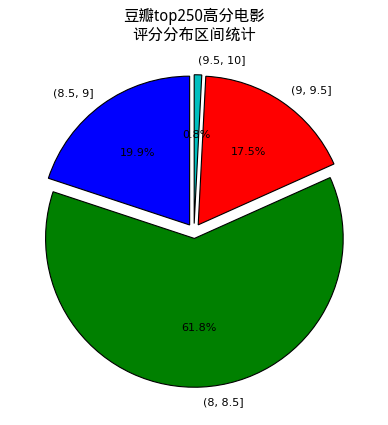

In [71]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

ind = pd.cut(df_movies.Rating, bins=[8, 8.5, 9, 9.5, 10])
gb_rates = df_movies.groupby(ind).size()
font = FontProperties(fname='/usr/share/fonts/chinese/wqy-microhei.ttf', size=14)   
plt.figure(figsize=(6, 6), dpi = 80)
plt.axes(aspect = 1)
plt.pie(gb_rates,
        explode = [0.05] * len(gb_rates), 
        labels=ind.value_counts().index,
        shadow = False,
        startangle = 90, 
        pctdistance = 0.6,
       autopct = "%3.1f%%")
plt.title("豆瓣top250高分电影\n评分分布区间统计",  fontproperties=font)
#plt.legend(loc = 'upper right')

In [39]:
ind.value_counts().index

CategoricalIndex(['(8.5, 9]', '(8, 8.5]', '(9, 9.5]', '(9.5, 10]'], categories=['(8, 8.5]', '(8.5, 9]', '(9, 9.5]', '(9.5, 10]'], ordered=True, dtype='category')

In [65]:
df_movies.groupby('Year')['Title'].count().sort_values(ascending=False)[:10]

Year
2004    13
2001    12
2010    12
1994    11
2013    10
2011    10
2009    10
2008    10
1997     9
2014     9
Name: Title, dtype: int64

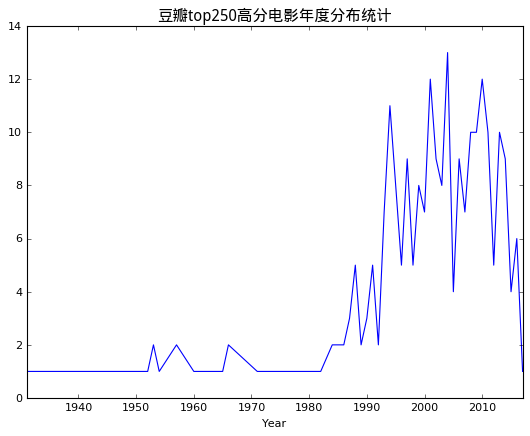

In [74]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
count_by_year = df_movies.groupby('Year')['Title'].count()
font = FontProperties(fname='/usr/share/fonts/chinese/wqy-microhei.ttf', size=14)
plt.figure(figsize=(8, 6), dpi = 80)
plt.title("豆瓣top250高分电影年度分布统计",  fontproperties=font)

count_by_year.plot()